In [ ]:
str1 = ['congrats. you have won a lottery of 1 million and you can get the lottery money by calling the lottery number',
        'give your bank details to get your lottery money of 1 million in your bank account',
        'lottery for sure if your bank account details are verified verified verified verified']

In [ ]:
type(str1)

list

In [ ]:
str1[0].split()  # tokenization

['congrats.',
 'you',
 'have',
 'won',
 'a',
 'lottery',
 'of',
 '1',
 'million',
 'and',
 'you',
 'can',
 'get',
 'the',
 'lottery',
 'money',
 'by',
 'calling',
 'the',
 'lottery',
 'number']

In [ ]:
str1[1].split()  # tokenization

['give',
 'your',
 'bank',
 'details',
 'to',
 'get',
 'your',
 'lottery',
 'money',
 'of',
 '1',
 'million',
 'in',
 'your',
 'bank',
 'account']

In [ ]:
str1[2].split()    # tokenization

['lottery',
 'for',
 'sure',
 'if',
 'your',
 'bank',
 'account',
 'details',
 'are',
 'verified',
 'verified',
 'verified',
 'verified']

In [ ]:
# Apply Bag Of Words technique / Count vectorizer (BOW)
from sklearn.feature_extraction.text import CountVectorizer 

In [ ]:
vect = CountVectorizer(stop_words='english') # importing the count vectorizer and removing the stop words as well from the tokens

op = vect.fit_transform(str1).toarray() #print the number  of times each word has been repeated in the form of an array
op

array([[0, 0, 1, 1, 0, 3, 1, 1, 1, 0, 0, 1],
       [1, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 4, 0]])

In [ ]:
# create a dataframe from this numpy array 
import pandas as pd 
df = pd.DataFrame(op,columns = vect.get_feature_names())
df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,account,bank,calling,congrats,details,lottery,million,money,number,sure,verified,won
0,0,0,1,1,0,3,1,1,1,0,0,1
1,1,2,0,0,1,1,1,1,0,0,0,0
2,1,1,0,0,1,1,0,0,0,1,4,0


In [ ]:
# SPAM HAM DATASET 
# CREATE A ML MODEL FOR PREDICTING IF A MESSAGE ENTERED WAS SPAM OR NOT  (SVM and NaiveBayes)

In [ ]:
import pandas as pd 

In [ ]:
df = pd.read_table("https://raw.githubusercontent.com/arib168/data/main/spam.tsv")
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [ ]:
x = df['message'].values
y = df['label'].values

In [ ]:
df['message'][896]

'Superb Thought- "Be grateful that u dont have everything u want. That means u still have an opportunity to be happier tomorrow than u are today.":-)'

In [ ]:
df['label'][896]

'ham'

In [ ]:
df['message'][1745]

'Someone has conacted our dating service and entered your phone because they fancy you!To find out who it is call from landline 09111030116. PoBox12n146tf15'

In [ ]:
df['label'][1745]

'spam'

In [ ]:
df['message'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [ ]:
df['label'][2]

'spam'

In [ ]:
df['message']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

In [ ]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

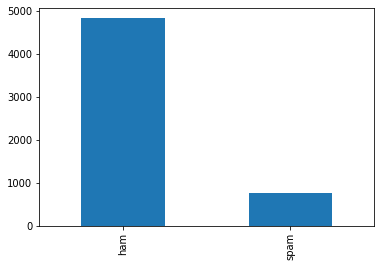

In [ ]:
df['label'].value_counts().plot(kind ='bar')

In [ ]:
#train test split 
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [ ]:
x_train.shape

(4179,)

In [ ]:
y_train.shape

(4179,)

In [ ]:
x_test.shape

(1393,)

In [ ]:
y_test.shape

(1393,)

In [ ]:
# Applying the Count vectorizer 
from sklearn.feature_extraction.text import CountVectorizer 
vect = CountVectorizer(stop_words='english')
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test)

In [ ]:
x_train_vect.toarray() #gives a sparse representation of numbers after converting from text 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# Apply the ML algorithm to fit and predict 

In [ ]:
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression()
# model.fit(x_train_vect,y_train)
# y_pred = model.predict(x_test_vect)
# accuracy_score(y_pred,y_test)

0.9798994974874372

In [ ]:
from sklearn.svm import SVC 

In [ ]:
model1 = SVC() 

In [ ]:
model1.fit(x_train_vect,y_train)

SVC()

In [ ]:
y_pred1 = model1.predict(x_test_vect)
y_pred1

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred1,y_test)

0.9813352476669059

In [ ]:
# model.predict(["Free entry"]) # it does not accept text data, we have convert it to numerical data using count vectorizer 

In [ ]:
# PIPELINE (combines two estimators = svc+countvectorizer)
# we use pipeline so that we need not vectorize the text every time we want to predict the output 
from sklearn.pipeline import make_pipeline 

model2 = make_pipeline(CountVectorizer(),SVC())

model2.fit(x_train,y_train) 

y_pred2 = model2.predict(x_test)
y_pred2

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred2,y_test)

0.9834888729361091

In [ ]:
# APPLY ML MODEL (NAIVE BAYES)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model3 = MultinomialNB() 

In [ ]:
model3.fit(x_train_vect,y_train)

MultinomialNB()

In [ ]:
y_pred3 = model3.predict(x_test_vect)
y_pred3

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype='<U4')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred3,y_test)

0.9863603732950467

In [ ]:
# PIPELINE WITH MultinomialNB 
# PIPELINE (combines two estimators = MultinomialNB+countvectorizer)
# we use pipeline so that we need not vectorize the text every time we want to predict the output 
from sklearn.pipeline import make_pipeline 

model4 = make_pipeline(CountVectorizer(),MultinomialNB())

model4.fit(x_train,y_train) 

y_pred4 = model4.predict(x_test)
y_pred4

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype='<U4')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred4,y_test)

0.9885139985642498

In [ ]:
# # ACCURACY SCORES FOR ALL 4 MODELS 
# SVC                       - 0.9813352476669059
# SVC pipeline              - 0.9834888729361091
# MultinomialNB             - 0.9863603732950467
# MultinomialNB pipeline    - 0.9885139985642498

In [ ]:
# joblib is more advanced than pickle, we use joblib for pipeline models 
# pickle model is used if svc or nb has higher accuracy 

In [ ]:
import joblib 
joblib.dump(model4,'spam-ham') #create a file for the best model to be used for predictions

['spam-ham']

In [ ]:
import joblib 
text_model = joblib.load('spam-ham')   #reloading the created joblib model for predictions 
text_model

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [ ]:
text_model.predict(["Free entry to the concert"]) # we are using joblib model to predict the output 

array(['spam'], dtype='<U4')

In [ ]:
# future scope - you can try using tfidf vectorizer (explore about it!!)

In [ ]:
# SENTIMENT ANALYSIS  AND TWITTER SENTIMENTS 














